# Testing batch loader randomness

In [1]:
import s2sml.torch_s2s_dataset as torch_s2s_dataset
from torch.utils.data import DataLoader
import torch

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
import os

## Config settings

In [4]:
# Data: from KD randtest_719 config settings (region example)
homedir = '/glade/derecho/scratch/molina/' #conf["data"]["homedir"]

var = "tas2m" #conf["data"]["var"]
wks = 3 #conf["data"]["wks"]
dxdy = 31 #conf["data"]["dxdy"]
lat0 = -55.0 #conf["data"]["lat0"]
lon0 = 280.0 #conf["data"]["lon0"]
norm = "minmax" #conf["data"]["norm"]
norm_pixel = False #conf["data"]["norm_pixel"]
dual_norm = False #conf["data"]["dual_norm"]
region = "fixed" #conf["data"]["region"]

feattopo = True #conf["data"]["feat_topo"]
featcoord = True #conf["data"]["feat_coord"]

## Create dataset

In [5]:
train = torch_s2s_dataset.S2SDataset(
                week=wks,
                variable=var,
                norm=norm,
                norm_pixel=norm_pixel,
                dual_norm=dual_norm,
                region=region,
                minv=None,
                maxv=None,
                mini=None,
                maxi=None,
                mnv=None,
                stdv=None,
                mni=None,
                stdi=None,
                lon0=lon0,
                lat0=lat0,
                dxdy=dxdy,
                feat_topo=feattopo,
                feat_lats=featcoord,
                feat_lons=featcoord,
                startdt="1999-02-01",
                enddt="1999-12-31",
                #enddt="2000-12-31",
                #enddt="2014-12-31",
                homedir=homedir,
)

### Inspect some properties of `train`

In [6]:
# file directory
train.cesm_dir

'/glade/derecho/scratch/molina/cesm_tas2m_week3/'

In [7]:
# list of files
train.list_of_cesm

['/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990201.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990208.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990215.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990222.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990301.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990308.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990315.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990322.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990329.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990405.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990412.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990419.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_19990426.nc',
 '/glade/derecho/scratch/molina/cesm_tas2m_week3/cm_tas2m_199905

In [8]:
# days of the month for week 3 leadtime
print(train.day_init, train.day_end)

15 21


In [135]:
# this only gets put in here after Dataloader step?
train.img_train

AttributeError: 'S2SDataset' object has no attribute 'img_train'

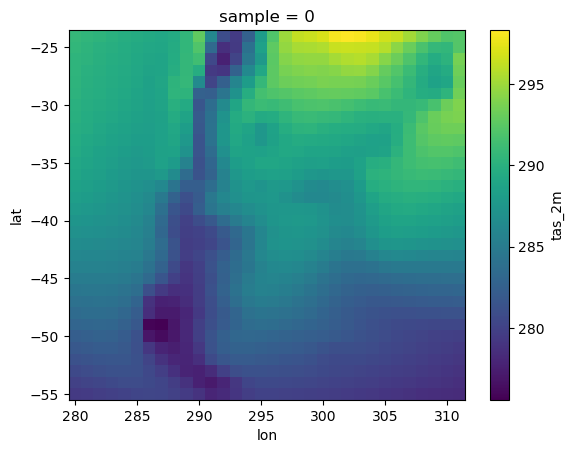

In [97]:
train.img_train.plot()

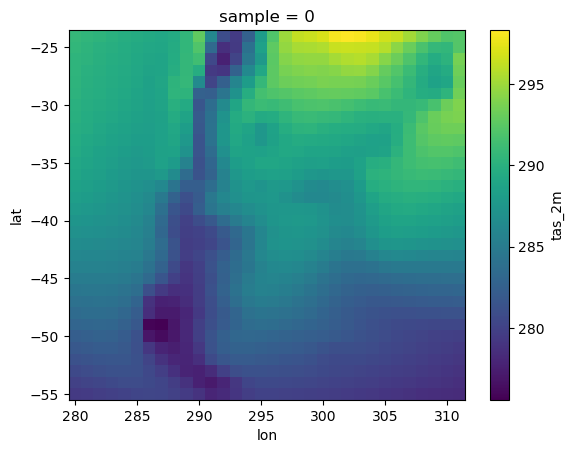

In [98]:
# reproducible but why only one index?
train.img_train.plot()

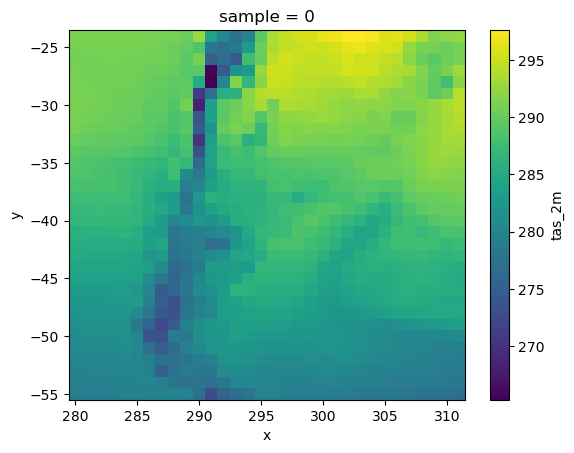

In [94]:
train.img_label.plot()

In [9]:
# example of how to index train (it is a list)
train[0]["input"].shape # dims are input channel x lat x lon (or something similar)

(4, 1, 32, 32)

In [10]:
# print out the values
for i in range(len(train.list_of_cesm)):
    print(train[i]["input"][3,0,0,0]) # last input channel (tas2m?) and the first spatial index

0.5087181329727173
0.5062133073806763
0.504371166229248
0.5024085640907288
0.5035187602043152
0.5023218989372253
0.4869505763053894
0.4903753399848938
0.4902275502681732
0.4775298535823822
0.48058339953422546
0.4723659157752991
0.46437421441078186
0.4619479179382324
0.47388046979904175
0.46676212549209595
0.4668988585472107
0.4664851725101471
0.4575706422328949
0.4487672746181488
0.4600772559642792
0.46168723702430725
0.4514658749103546
0.4451068341732025
0.44416600465774536
0.4464462697505951
0.4501613676548004
0.4569172263145447
0.4605066776275635
0.46429917216300964
0.47283023595809937
0.4600900709629059
0.463379830121994
0.4751553237438202
0.47687700390815735
0.470411479473114
0.45766374468803406
0.47154319286346436
0.47409868240356445
0.47838282585144043
0.48400989174842834
0.48804035782814026
0.4873875379562378
0.4954996705055237
0.506888210773468
0.5000887513160706
0.4955613613128662
0.5025650858879089


## Batch size and dataloader

In [11]:
train_batch_size = 32 #conf["trainer"]["train_batch_size"]

In [64]:
train_loader = DataLoader(
                train, batch_size=train_batch_size, shuffle=True, drop_last=True
)

### Print out values in a loop that grabs the batches (no seeds set)

tensor([0.4576, 0.4601, 0.4956, 0.4741, 0.4874, 0.4775, 0.4955, 0.4739, 0.5024,
        0.5035, 0.5044, 0.4904, 0.4840, 0.4617, 0.4752, 0.4644, 0.4442, 0.4668,
        0.4569, 0.4784, 0.4488, 0.4502, 0.4619, 0.4601, 0.4643, 0.5001, 0.4464,
        0.4715, 0.4515, 0.4769, 0.4902, 0.4451], dtype=torch.float64)


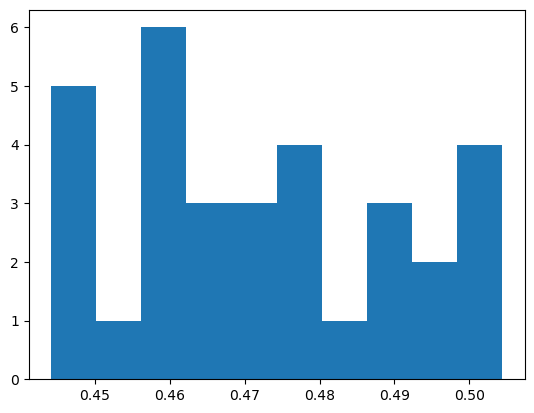

In [65]:
for data in train_loader:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # select all the batches for the last input channel (tas2m?) and the first spatial index
    print(x) 
    plt.hist(x)

### Values change each time you run this (notice that the histogram is different)

tensor([0.5069, 0.4605, 0.4643, 0.4502, 0.4488, 0.4904, 0.4775, 0.4451, 0.4902,
        0.5087, 0.4515, 0.5044, 0.4880, 0.4741, 0.4442, 0.4577, 0.4739, 0.4644,
        0.4874, 0.4669, 0.4617, 0.5062, 0.4870, 0.4769, 0.4601, 0.5035, 0.4668,
        0.4752, 0.4569, 0.4601, 0.4464, 0.4715], dtype=torch.float64)


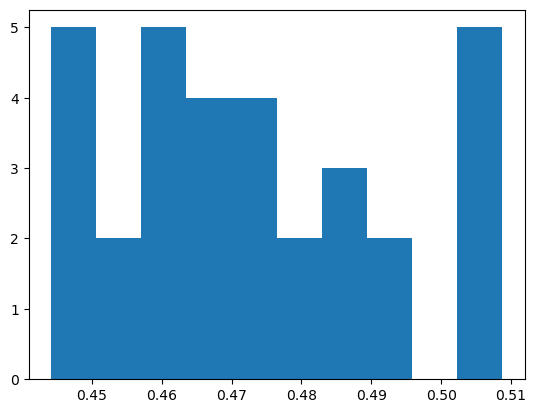

In [66]:
for data in train_loader:
    x = data["input"].squeeze(dim=2)[:,3,0,0]
    print(x)
    plt.hist(x)

## Try to match batch size to number of time samples

In [51]:
len(train.list_of_cesm) # 48 time samples

48

In [21]:
train_batch_size_v2 = 48

### New instance of dataloader with different batch size

In [53]:
train_loader_match = DataLoader(
    train, batch_size=train_batch_size_v2, shuffle=True, drop_last=True
)

In [26]:
train_loader_match.batch_sampler.sampler

In [81]:
train_loader_match.generator

In [82]:
train_loader_match.worker_init_fn

tensor([0.4634, 0.4451, 0.4880, 0.4956, 0.4669, 0.5023, 0.4724, 0.4874, 0.4668,
        0.4576, 0.5035, 0.4644, 0.4904, 0.4569, 0.4619, 0.4840, 0.4775, 0.4955,
        0.4464, 0.4601, 0.4515, 0.4739, 0.4870, 0.5044, 0.4752, 0.4784, 0.5001,
        0.4741, 0.4502, 0.4643, 0.4769, 0.4442, 0.4902, 0.4806, 0.4704, 0.4715,
        0.4605, 0.5062, 0.5024, 0.4617, 0.4665, 0.4601, 0.5087, 0.5026, 0.4577,
        0.4488, 0.4728, 0.5069], dtype=torch.float64)


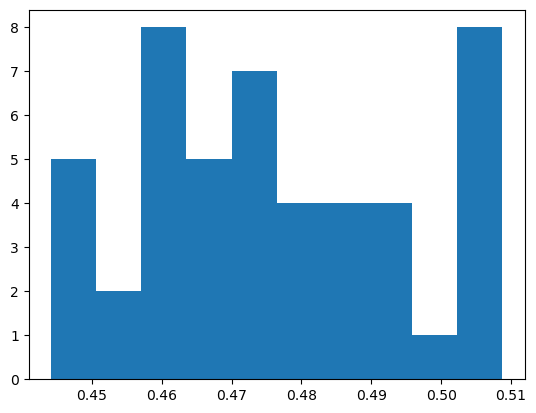

In [54]:
for data in train_loader_match:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

tensor([0.4617, 0.4515, 0.4904, 0.4665, 0.5087, 0.4576, 0.4569, 0.4577, 0.5026,
        0.4601, 0.4619, 0.4643, 0.4668, 0.4806, 0.4644, 0.5024, 0.4502, 0.5062,
        0.4488, 0.5023, 0.4870, 0.4601, 0.4840, 0.4605, 0.4769, 0.4752, 0.5069,
        0.4874, 0.5035, 0.5001, 0.4880, 0.4442, 0.4739, 0.4741, 0.4955, 0.4724,
        0.4784, 0.4451, 0.4956, 0.4728, 0.4775, 0.4669, 0.4634, 0.4715, 0.5044,
        0.4902, 0.4704, 0.4464], dtype=torch.float64)


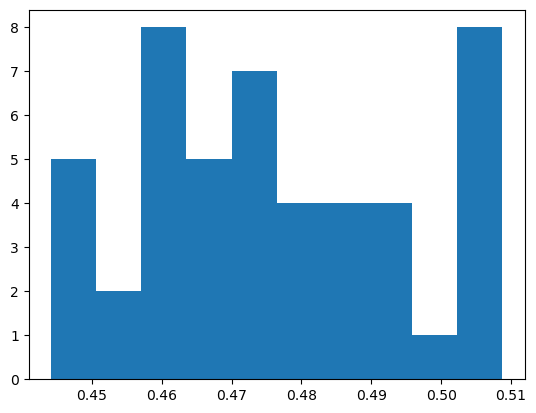

In [55]:
# plot is the same but the order is different
for data in train_loader_match:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

### Note: histogram plots are the same (as expected since the batch size matches the # time samples) but the order is different!

### Now try `shuffle=False` with yet another dataloader

In [56]:
train_loader_match_shuffle = DataLoader(
    train, batch_size=train_batch_size_v2, shuffle=False, drop_last=True
)

tensor([0.5087, 0.5062, 0.5044, 0.5024, 0.5035, 0.5023, 0.4870, 0.4904, 0.4902,
        0.4775, 0.4806, 0.4724, 0.4644, 0.4619, 0.4739, 0.4668, 0.4669, 0.4665,
        0.4576, 0.4488, 0.4601, 0.4617, 0.4515, 0.4451, 0.4442, 0.4464, 0.4502,
        0.4569, 0.4605, 0.4643, 0.4728, 0.4601, 0.4634, 0.4752, 0.4769, 0.4704,
        0.4577, 0.4715, 0.4741, 0.4784, 0.4840, 0.4880, 0.4874, 0.4955, 0.5069,
        0.5001, 0.4956, 0.5026], dtype=torch.float64)


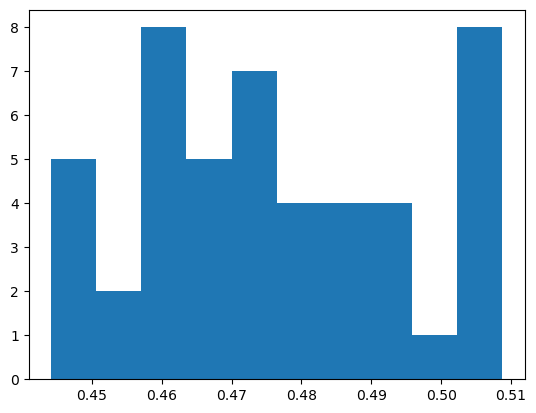

In [57]:
for data in train_loader_match_shuffle:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

tensor([0.5087, 0.5062, 0.5044, 0.5024, 0.5035, 0.5023, 0.4870, 0.4904, 0.4902,
        0.4775, 0.4806, 0.4724, 0.4644, 0.4619, 0.4739, 0.4668, 0.4669, 0.4665,
        0.4576, 0.4488, 0.4601, 0.4617, 0.4515, 0.4451, 0.4442, 0.4464, 0.4502,
        0.4569, 0.4605, 0.4643, 0.4728, 0.4601, 0.4634, 0.4752, 0.4769, 0.4704,
        0.4577, 0.4715, 0.4741, 0.4784, 0.4840, 0.4880, 0.4874, 0.4955, 0.5069,
        0.5001, 0.4956, 0.5026], dtype=torch.float64)


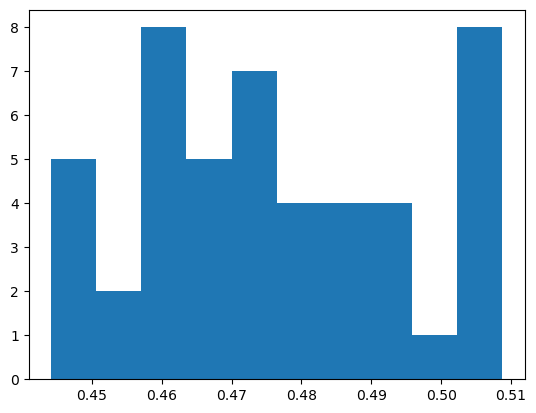

In [60]:
# plot and order are the same
for data in train_loader_match_shuffle:
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

### Order is now the same (without setting any seeds)

## Now try setting the seeds

In [47]:
#For reference from s2sml code...

#seed = 150
#random.seed(seed)
#os.environ["PYTHONHASHSEED"] = str(seed)
#np.random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed(seed)
#    torch.backends.cudnn.benchmark = True
#    torch.backends.cudnn.deterministic = True

In [67]:
torch.cuda.is_available()

False

In [12]:
torch.initial_seed()

7161087602281443734

### Set all the seeds from `seed_everything` here in this function
See: https://pytorch.org/docs/stable/notes/randomness.html#dataloader

In [13]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    numpy.random.seed(worker_seed)
    random.seed(worker_seed)
    os.environ["PYTHONHASHSEED"] = str(worker_seed)
    torch.manual_seed(worker_seed)

In [14]:
g = torch.Generator()
g.manual_seed(0)

### New DataLoader instance with the seeds set

In [15]:
train_loader_rand = DataLoader(
    train, batch_size=train_batch_size, shuffle=True, 
    drop_last=True, worker_init_fn=seed_worker, generator=g
)

In [25]:
train_loader_rand.batch_sampler.sampler

In [124]:
train_loader_rand.generator

In [125]:
train_loader_rand.worker_init_fn

<function __main__.seed_worker(worker_id)>

### Print out values in a loop that grabs the batches (seeds set)

/glade/work/kdagon/conda-envs/s2sml-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py:171: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


torch.Size([32, 4, 32, 32])
tensor([0.5023, 0.5035, 0.4668, 0.4569, 0.4488, 0.4704, 0.4601, 0.4902, 0.4643,
        0.4601, 0.4634, 0.5087, 0.4515, 0.4442, 0.4769, 0.4577, 0.4874, 0.5069,
        0.4665, 0.4617, 0.4870, 0.4880, 0.4576, 0.4784, 0.4715, 0.4724, 0.4464,
        0.5001, 0.4904, 0.4955, 0.5026, 0.4728], dtype=torch.float64)


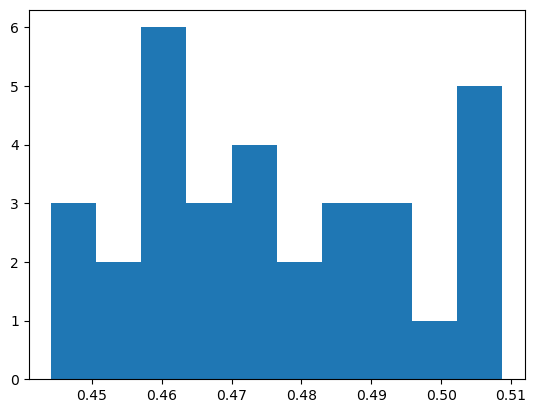

In [16]:
for i,data in enumerate(train_loader_rand):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

tensor([0.5023, 0.4769, 0.4752, 0.4442, 0.4634, 0.4806, 0.4902, 0.4488, 0.4577,
        0.4741, 0.4715, 0.4870, 0.4451, 0.4515, 0.4576, 0.4775, 0.5024, 0.4643,
        0.5087, 0.4617, 0.4955, 0.4724, 0.5001, 0.4904, 0.4739, 0.4644, 0.4784,
        0.5035, 0.4669, 0.4874, 0.4605, 0.4840], dtype=torch.float64)


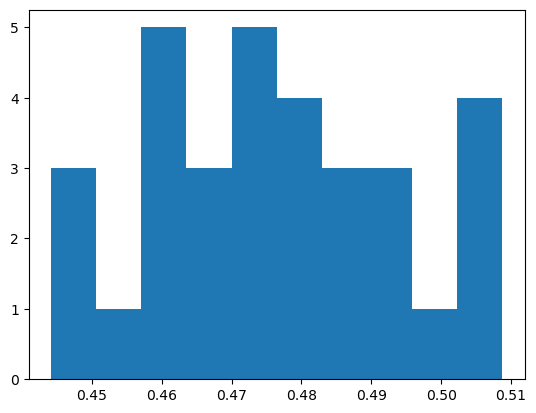

In [17]:
for i,data in enumerate(train_loader_rand):
    #print(i)
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

### Note: the first output is the same in the above cases, and then it differs (not sure if that's meaningful?)

tensor([0.4451, 0.4669, 0.4605, 0.4601, 0.5035, 0.4634, 0.4502, 0.4577, 0.4488,
        0.4464, 0.4704, 0.5024, 0.5087, 0.4956, 0.4442, 0.4739, 0.4806, 0.5023,
        0.4644, 0.4715, 0.4724, 0.4515, 0.4741, 0.4775, 0.4643, 0.5062, 0.4576,
        0.4752, 0.4668, 0.4902, 0.4569, 0.4874], dtype=torch.float64)


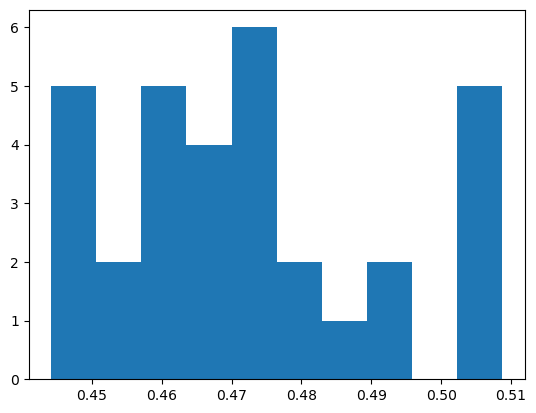

In [19]:
# doesn't hold if you run a third time
for i,data in enumerate(train_loader_rand):
    #print(i)
    #print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

### Try with the modified batch size

In [22]:
train_loader_rand_match = DataLoader(
    train, batch_size=train_batch_size_v2, shuffle=True, 
    drop_last=True, worker_init_fn=seed_worker, generator=g
)

torch.Size([48, 4, 32, 32])
tensor([0.5069, 0.4728, 0.4569, 0.4617, 0.5062, 0.4601, 0.4775, 0.4643, 0.4451,
        0.4669, 0.4904, 0.4502, 0.4769, 0.4880, 0.4741, 0.4665, 0.4644, 0.4605,
        0.4704, 0.4902, 0.4752, 0.4576, 0.4464, 0.4739, 0.4806, 0.5026, 0.4955,
        0.4784, 0.4577, 0.4874, 0.5024, 0.4488, 0.4724, 0.4956, 0.4619, 0.4634,
        0.4840, 0.5001, 0.4515, 0.4601, 0.4442, 0.4715, 0.4668, 0.5087, 0.5035,
        0.5023, 0.5044, 0.4870], dtype=torch.float64)


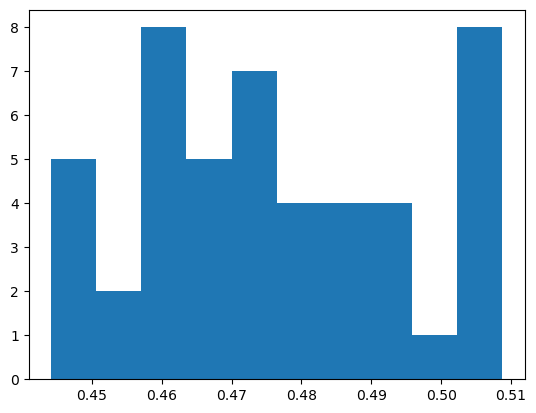

In [23]:
for i,data in enumerate(train_loader_rand_match):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

torch.Size([48, 4, 32, 32])
tensor([0.4605, 0.5062, 0.4840, 0.4902, 0.4669, 0.4956, 0.4724, 0.4728, 0.4955,
        0.4569, 0.4704, 0.4668, 0.4752, 0.4488, 0.4451, 0.4769, 0.4715, 0.4870,
        0.4464, 0.4644, 0.4577, 0.4619, 0.5023, 0.5069, 0.4601, 0.4601, 0.5044,
        0.5001, 0.5035, 0.5026, 0.4515, 0.4741, 0.4634, 0.4442, 0.4502, 0.4576,
        0.4617, 0.4739, 0.4665, 0.4880, 0.5087, 0.4904, 0.5024, 0.4775, 0.4784,
        0.4643, 0.4806, 0.4874], dtype=torch.float64)


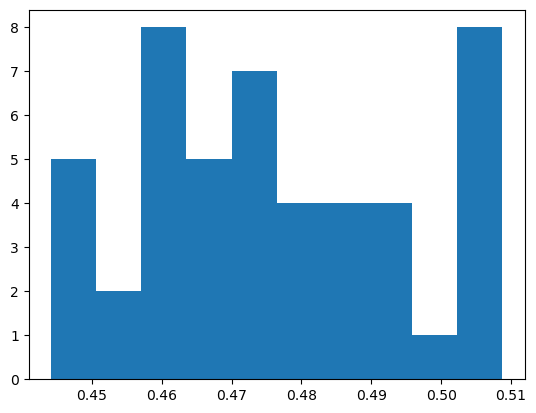

In [24]:
for i,data in enumerate(train_loader_rand_match):
    #print(i)
    print(data["input"].squeeze(dim=2).shape) # dims are batch size x input channel x lat x lon (or something similar)
    x = data["input"].squeeze(dim=2)[:,3,0,0] # all the batches for the last input channel and the first spatial index
    print(x) 
    plt.hist(x)

### Histogram is the same (as expected) but the order is still different, and the first index is no longer the same

### Thoughts: changing the sampler parameter to DataLoader may help with this, but you can't use that when `shuffle=True`
https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler